In [9]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from skimage import transform
from imageio import imread
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict
from PIL import Image
import image

# Some constants 
TRAIN_FOLDER = './data/train/'
TEST_FOLDER = './data/test/'
TEST_INPUT_FOLDER = './data/test/input/'
INPUT_FOLDER = TRAIN_FOLDER + 'input/'
LABELS_FOLDER = TRAIN_FOLDER + 'labels/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()
print(patients)

from skimage.color import rgb2gray

def load_input_image(patient, inp_folder=INPUT_FOLDER):
    return rgb2gray(imread(inp_folder + patient + '/images/' + os.listdir(inp_folder + patient + '/images/')[0]))
    
def load_input_masks(patient):
    masks = os.listdir(INPUT_FOLDER + patient + '/masks/')
    return [imread(INPUT_FOLDER + patient + '/masks/' + mask) for mask in masks]

def get_num_nuclei(patient):
    return len(os.listdir(INPUT_FOLDER + patient + '/masks/'))

def get_composed_masks_img(patient):
    masks = load_input_masks(patient)
    composed_mask = masks[0]
    for mask in masks:
        composed_mask = np.maximum(composed_mask, mask)
    return composed_mask

def show_image_and_masks(patient):
    masks = load_input_masks(patient)
    fig = plt.figure()
    plt.title("Patient: {}".format(patient))
    plt.subplot(211)
    plt.imshow(load_input_image(patient))
    masks = load_input_masks(patient)
    composed_mask = get_composed_masks_img(patient)
    plt.subplot(212)
    plt.imshow(composed_mask)
    
def resize_images(img):
    resizedimg = transform.resize(img, (256, 256))
    return resizedimg
    
    


['00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552', '003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1', '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e', '0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed', '01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf', '0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21', '0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426', '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339', '03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776', '03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe', '03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a', '0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd', '04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e', '05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13', '0532c64c2fd0c4d3188cc751cdfd566b1cfba3d2693587

In [10]:
from skimage.color import rgb2gray

def load_input_image(patient, inp_folder=INPUT_FOLDER):
    return rgb2gray(imread(inp_folder + patient + '/images/' + os.listdir(inp_folder + patient + '/images/')[0]))
    
def load_input_masks(patient):
    masks = os.listdir(INPUT_FOLDER + patient + '/masks/')
    return [imread(INPUT_FOLDER + patient + '/masks/' + mask) for mask in masks]

def get_num_nuclei(patient):
    return len(os.listdir(INPUT_FOLDER + patient + '/masks/'))

439
602
142


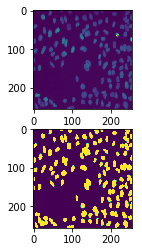

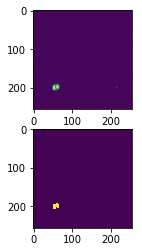

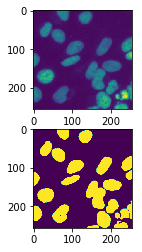

In [14]:
def get_composed_masks_img(patient):
    masks = load_input_masks(patient)
    composed_mask = masks[0]
    for mask in masks:
        composed_mask = np.maximum(composed_mask, mask)
    return composed_mask

def show_image_and_masks(patient):
    masks = load_input_masks(patient)
    fig = plt.figure()
    plt.title("Patient: {}".format(patient))
    plt.subplot(211)
    plt.imshow(resize_images(load_input_image(patient)))
    masks = load_input_masks(patient)
    composed_mask = get_composed_masks_img(patient)
    resized_cmask = resize_images(composed_mask)
    plt.subplot(212)
    plt.imshow(resized_cmask)
    
inps = []
for i in range(3):
    idx = random.choice(range(len(patients)))
    print(idx)
    inp = load_input_image(patients[idx])
    masks = load_input_masks(patients[idx])
    show_image_and_masks(patients[idx])


In [25]:
from sklearn.naive_bayes import GaussianNB

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gnb = GaussianNB()
import pdb
## train a naive bayes classifier on a few examples and see how it does
input_x = []
input_y = []
train_data = int(len(patients) * .8)
for i in range(train_data):
    img = resize_images(load_input_image(patients[i]))
    input_x.append(img)
    yimg = resize_images(get_composed_masks_img(patients[i]))
    input_y.append(yimg)
    if img.shape != (256, 256):
        print "x dimensions wrong"
        print img.shape
        print i
    if yimg.shape != (256, 256):
        print "y dimensions wrong"
        print yimg.shape
        print i
    

    
    

In [26]:
gnb.fit(np.array(input_x), np.array(input_y))   

ValueError: Found array with dim 3. Estimator expected <= 2.